In [2]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
%matplotlib inline
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

from build_database import build_database
from load_sim_constants import load_sim_constants
from precip_model import precip_model
# Generate database for each energy ban

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = 18 #fig_width_pt*inches_per_pt  # width in inches
fig_height = 8 # fig_width*golden_mean*2      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 20,
          'font.size': 16,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

# --------------- Latex Plot Beautification --------------------------

In [228]:
def nearest_index(grid, values):
    # Find closest index of a value in an array (i.e., quick quantize to grid value)
    idx = np.searchsorted(grid, values, side="left")
    idx = np.clip(idx, 0, len(grid) - 1)
    idx_l = np.clip(idx - 1, 0, len(grid) - 1)

    idx[abs(values - grid[idx_l]) < abs(values - grid[idx])] -= 1
    return idx


failed: sc.T_STEP = (1.0*((1.0*T_MAX)/NUM_STEPS))
[(218, 292), (292, 365), (365, 438), (438, 511)]
failed: sc.T_STEP = (1.0*((1.0*T_MAX)/NUM_STEPS))
input latitudes [15, 20, 25, 30, 35, 40, 45, 50]
output latitudes [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
output longitudes [0]
loading  15 0
N NaNs: 0
S NaNs: 0
N_max:  3.32007557164e-09
loading  20 0
N NaNs: 0
S NaNs: 0
N_max:  2.42934548808e-07
loading  25 0
N NaNs: 0
S NaNs: 0
N_max:  7.72049665738e-05
loading  30 0
N NaNs: 0
S NaNs: 0
N_max:  0.0032240852278
loading  35 0
N NaNs: 0
S NaNs: 0
N_max:  0.0195451003209
loading  40 0
N NaNs: 0
S NaNs: 0
N_max:  0.0481173254149
loading  45 0
N NaNs: 0
S NaNs: 0
N_max:  0.0481173254149
loading  50 0
N NaNs: 0
S NaNs: 0
N_max:  0.0481173254149
Saving database
failed: sc.T_STEP = (1.0*((1.0*T_MAX)/NUM_STEPS))
input latitudes [15, 20, 25, 30, 35, 40, 45, 50]
output latitudes 

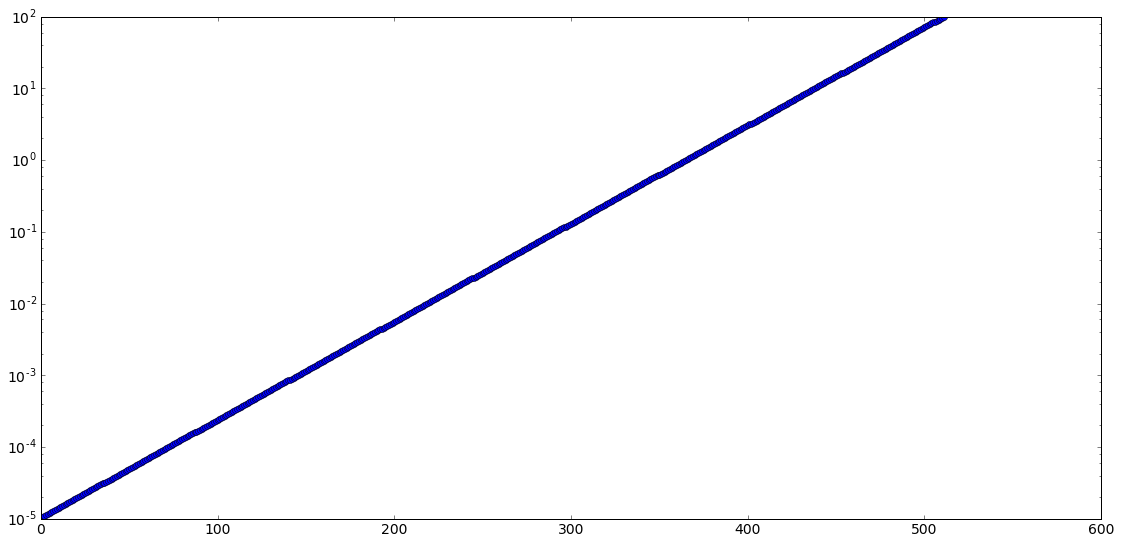

In [24]:
# Analyze the energy dependence of precipitation:
from build_database import build_database
from load_sim_constants import load_sim_constants
from precip_model import precip_model
# Generate database for each energy band:
input_dir = "/shared/users/asousa/WIPP/WIPPv4/outputs/agu2016_kp0_v3/pwr_-10000"

sc = load_sim_constants(os.path.join(input_dir, 'consts.h'))

# Get full energy vector:
E_EXP = sc.E_EXP_BOT + np.linspace(1,sc.NUM_E,sc.NUM_E)*sc.DE_EXP
E = np.power(10, E_EXP)

plt.figure()
plt.semilogy(E*1e-6,'o-')

dividers = np.array([0.01, 0.1, 1, 10, 100])*1e6  # ev


# dividers = np.power(10, np.arange(sc.E_EXP_BOT, sc.E_EXP_BOT + (sc.NUM_E+1)*sc.DE_EXP, step=0.5))
# # print E
# # print dividers
divider_inds = nearest_index(E, dividers)
# print divider_inds
d_low = divider_inds[0:-1]
d_hi  = divider_inds[1:]
bands = zip(d_low, d_hi)
print bands

for i, band in enumerate(bands):
    build_database(input_dir=input_dir, output_filename='db_band_%d.pkl'%i, flux_dir='phi_mode2_diff', bands=band, outlons=[0])


(40,)


(2, 3.5)

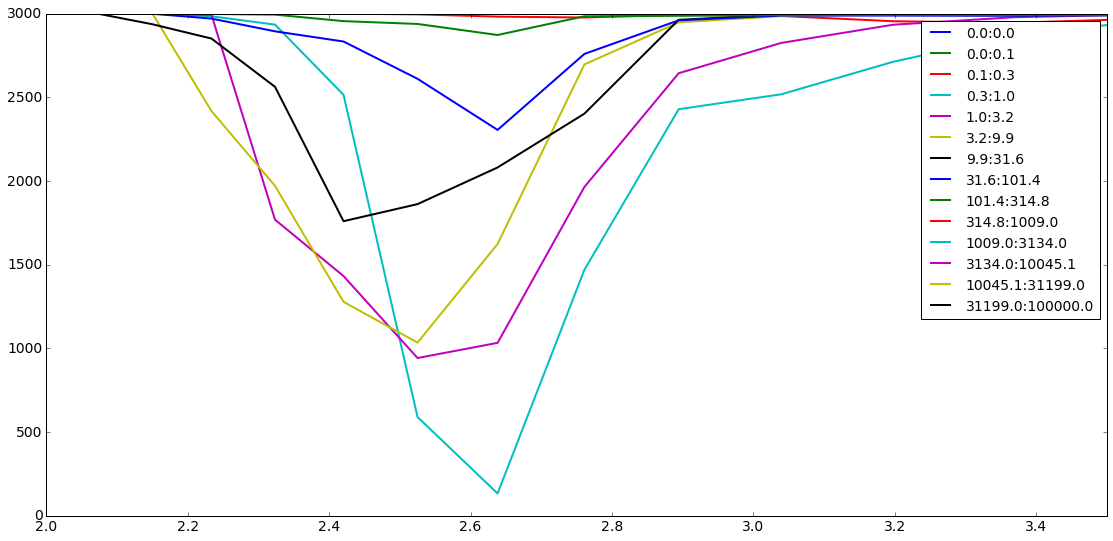

In [319]:
from coordinate_structure import coordinate_structure

p = precip_model(database="banded_regular/db_band_8.pkl", cumsum=False)

totes_per_band = dict()


for ib, b in enumerate(bands):
    p = precip_model(database="banded_regular/db_band_%d.pkl"%ib, cumsum=True)
    

    # Don't bother interpolating -- just get the raw values (Only one longitude).
    N = p.N[:,:,0,:]
    S = p.S[:,:,0,:]
#     print np.max(N)

    # totes_per_band = np.zeros([len(bands), len(p.in_lats), len(p.out_lats)])

    # Integrate over time axis to get total flux at each latitude:
    totes = p.N[:,:,0,-1]
    totes_per_band[b] = totes
    

# totes_per_band has dimensions(band number, input latitude, output latitude)
# Value is total electrons scattered per cm^2 within energy band, across the entire flash



# N = p.N[:,:,0,:]

# Ns = np.sum(p.N[:,:,0,:],axis=-1)
# fig, ax = plt.subplots(1,2)

# ax[0].imshow(np.log10(N[7,:,:]), origin='lower',aspect='auto')

# ax[1].semilogy(Ns.T);


# plt.figure()
# plt.subplot(2,1,1)
# plt.plot(Ns.T);
# plt.subplot(2,1,2)
# plt.plot(totes_per_band[bands[8]][0,:].T);


# Get output L-shells
cs = coordinate_structure(p.out_lats, [0], [100],'geomagnetic')
cs.transform_to('L_dipole')
L_targs = cs.L()

fig, ax = plt.subplots(1,1)
x = L_targs
print np.shape(x)
inlat_ind = 5;
for b in bands:
    y = np.abs(totes_per_band[b][inlat_ind,:])
#     y = (np.max(y) - y)/np.max(y)
    y = 3000 - y
#     y = totes[b]
    ax.plot(x,y,label='%2.1f:%2.1f'%(E[b[0]]/1000., E[b[1]]/1000.),linewidth=2);
    
ax.legend()
ax.set_xlim([2,3.5])
# ax.set_ylim([1e-10, 1])
# # plt.imshow(y,origin='lower',aspect='auto', interpolation='none')

In [9]:
db_dir = 'banded_regular'


# print dd
# import re
# regex = re.compile("\d+")
# bands = [int(regex.findall(bbb)[0]) for bbb in os.listdir(db_dir) if bbb.endswith(".pkl")]
# print bands



# b_ind = 1
# b = bands[b_ind]
for b_ind, b in enumerate(bands):
# Plot lat-time-intensity for each input flash:
    p = precip_model(database=os.path.join(db_dir,"db_band_%d.pkl"%b_ind), cumsum=False)

    t = p.t
    out_lats = p.out_lats
    in_lats  = p.in_lats
#     clims=[-8,-2]
    clims=[-3, 5]


    fig = plt.figure()
    ax=[]
    N = p.N[:,:,0,:]
    S = p.S[:,:,0,:]
    for i,lat in enumerate(sorted(in_lats)):
        ax.append(fig.add_subplot(len(in_lats),1,i+1))
        Nv = np.log10(np.maximum(0,N[i,:,:]))
        Nv = np.clip(Nv,clims[0],clims[1])

        p1 = plt.pcolormesh(t, out_lats, Nv)
        ax[i].set_xticks([])
        ax[i].set_yticks([30, 40, 50, 60])
        ax[i].set_ylabel('$%d^o$'%lat)
        plt.clim(clims)

    ax[-1].set_xticks(np.arange(0, t[-1]+1,step=5))
    ax[-1].set_xlabel('Time from flash (sec)')

    cb = plt.colorbar(p1, ax=ax, pad=0.02)
    ctix = np.arange(clims[0], clims[1] + 1, step=1)
    cb.set_ticks(ctix)
    cb.set_ticklabels(['10$^{%d}$'%k for k in ctix])
    cb.set_label('Particle flux [el/cm$^2$ sec]')
    plt.suptitle('band %d (between %2.3f and %2.3f kev)'%(b_ind, E[b[0]]/1000., E[b[1]]/1000.))

    plt.savefig('banded_regular/figures/band_%d.png'%b_ind)
    plt.close('all')


In [39]:
sorted?

In [ ]:
# /*
#  * FUNCTION: getJdiff
#  * ------------------
#  * Using the AE8 data stored in J, calculate the differential flux 
#  * by taking the (energy) derivative of the integral flux, dividing
#  * by the total solid angle and extrapolating down in energy if 
#  * need be.
#  *
#  */
double  getJdiff(float J[][100], double E, double alpha_lc)
{
  int row, i, topCol, botE;
  double J1, J2, I, x1, x2, y1, y2, m, c, x_ext, y_ext, J_ext;

  row = (int)floor((L_TARG+0.11 - J[1][0])/0.1); // to make sure! 
  
  // if(  fabs((double)J[row][0]-L_TARG) > 1e-3   ) 
  //   printf("\nL-shell not matching data\n\a");

  I = PI * cos(alpha_lc) * (PI - 2*alpha_lc);

  // Find column corresponding to highest energy value
  for(i=0; i<100; i++) {
    if(J[0][i+1] < 0.01) { 
      topCol = i; 
      break; 
    }
  }



  // Case 1. E < 100 keV
  // -------------------

  if( E <= 1e5 ) {
 
    // diff flux @ 100 keV and 200 keV
    J1 = 1e-6*fabs(J[row][2] - J[row][1]) / (J[0][2] - J[0][1]); 
    J2 = ((1e-6*fabs(J[row][3] - J[row][2]) / (J[0][3] - J[0][2])) 
      + J1 )/2; // central difference

    // do extrapolation in log-log space for best fit 
    x1 = log10( J[0][1]*1e6 );
    x2 = log10( J[0][2]*1e6 );
    y1 = log10( J1 );
    y2 = log10( J2 );

    m = (y2-y1)/(x2-x1);            // gradient of line
    c = (y1*x2 - y2*x1)/(x2-x1) ;   // offset of line, i.e.
    
    // y = m*x + c
    x_ext = log10( E );
    y_ext = m*x_ext + c;
    J_ext = pow(10, y_ext);

    return (J_ext/I);

  }


  

  // Case 2. E > 7 MeV
  // -----------------

  if( E >= 7e6 ) {
  
    // If flux at 7 Mev = 0, flux above it is zero too
    if( J[row][topCol]==0 )  return 0;

    // Otherwise need to extrapolate as in case 1.
    // diff flux @ 6.5 MeV and 7 MeV
    J2 = 1e-6*fabs( J[row][topCol] - J[row][topCol-1] ) 
      / (J[0][topCol] - J[0][topCol-1]); 

    J1 = ((1e-6*fabs( J[row][topCol-1] - J[row][topCol-2]) / 
       (J[0][topCol-1] - J[0][topCol-2]) ) + J2 )/2; // cdiff

    // do extrapolation in log-log space for best fit 
    x1 = log10( J[0][topCol-1]*1e6 );
    x2 = log10( J[0][topCol]*1e6 );
    y1 = log10( J1 );
    y2 = log10( J2 );

    m = (y2-y1)/(x2-x1);        // gradient of line
    c = (y1*x2 - y2*x1)/(x2-x1) ;   // offset of line, i.e.
                    // y = m*x + c
    x_ext = log10( E );
    y_ext = m*x_ext + c;
    J_ext = pow(10, y_ext);

    if(J_ext < 1e-10 ) J_ext = 0.0;

    return (J_ext/I);
  }


  // Case 3. 100 keV < E < 7 MeV
  if( E<7e6 && E>1e5 ) {


    // Find column corresponding lower energy value
    for(i=1; i<100; i++) {
      if( (J[0][i+1]*1e6) > E ) { 
    botE = i; 
    break; 
      }
    }


    // central diff flux @ lower and higher energies
    J1 = ( (1e-6 * fabs( J[row][botE] - J[row][botE-1] )
        / ( J[0][botE] - J[0][botE-1] ) ) + 
       (1e-6 * fabs( J[row][botE+1] - J[row][botE] )
        / ( J[0][botE+1] - J[0][botE] ) )  ) / 2;

    J2 = ( (1e-6 * fabs( J[row][botE+1] - J[row][botE] )
        / ( J[0][botE+1] - J[0][botE] ) ) + 
       (1e-6 * fabs( J[row][botE+2] - J[row][botE+1] )
        / ( J[0][botE+2] - J[0][botE+1] ) )  ) / 2;

    if(botE == 1)
      J1 =  (1e-6 * fabs( J[row][botE+1] - J[row][botE] )
          / ( J[0][botE+1] - J[0][botE] ) );
    
    if(botE == (topCol-1))
      J2 = (1e-6 * fabs( J[row][botE+1] - J[row][botE] )
        / ( J[0][botE+1] - J[0][botE] ) );
    



    // If J1 = J2 = 0, interpolated value also 0
    if( J1==0 && J2==0 ) return 0;



    // If only J2 = 0, do linear interpolation
    if( J2 == 0 ) {
      J_ext = J1*( ( J[0][botE+1]-(E*1e-6) )/
           ( J[0][botE+1] - J[0][botE] ) );
      return (J_ext/I);
    }



    // Otherwise interpolate as in case 1 (log-log space)

    x1 = log10( J[0][botE]*1e6 );
    x2 = log10( J[0][botE+1]*1e6 );
    y1 = log10( J1 );
    y2 = log10( J2 );

    m = (y2-y1)/(x2-x1);        // gradient of line
    c = (y1*x2 - y2*x1)/(x2-x1) ;   // offset of line, i.e.
                    // y = m*x + c
    x_ext = log10( E );
    y_ext = m*x_ext + c;
    J_ext = pow(10, y_ext);

    return (J_ext/I);
  }

}

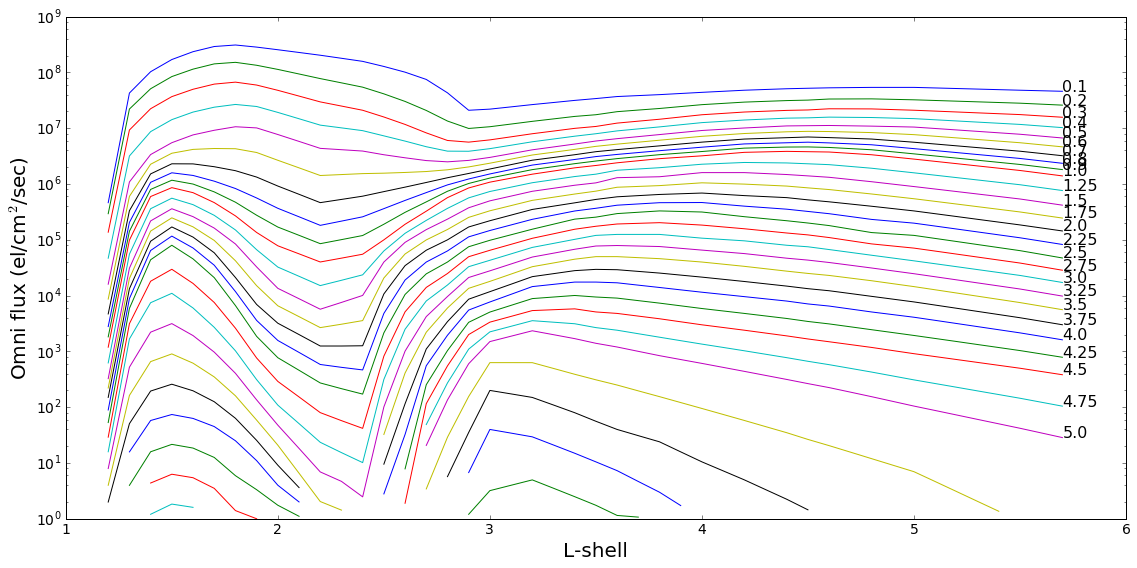

In [314]:
J_file = '../WIPPv4/codesrc/EQFLUXMA.dat'
J = np.loadtxt(J_file)

# J has dimensions L-shell x Energy
Jl = J[1:,0]  # First column: L-shells
Je = J[0,1:]  # First row: Energies
J = J[1:,1:]  # Data

plt.figure()
plt.semilogy(Jl, J);
plt.xlabel('L-shell')
plt.ylabel('Omni flux (el/cm$^2$/sec)')

for ji, jv in enumerate(Je):
    plt.text(Jl[-1], J[-1,ji], jv)



In [326]:
db_dir = 'banded_regular/'
import re

r = re.compile('\d+')
d = os.listdir(db_dir)
bands = [int(r.findall(f)[0]) for f in d if f.endswith('.pkl')]
print bands

[13, 0, 4, 6, 3, 8, 11, 9, 2, 10, 7, 5, 12, 1]


In [419]:
p = precip_model(database='db_band_4.pkl',cumsum=True)

# p.in_lats = [15, 20, 25, 30, 35, 40, 45, 50]
print p.in_lats
print p.out_lats
print p.out_lons
print p.t

# p.N = np.tile(p.N,[1,1,3,1])


p.precalculate_gridded_values(p.in_lats, p.out_lats, [0], p.t)

print np.sum(np.isnan(p.precalculated))
N_interp = interpolate.RegularGridInterpolator((p.in_lats, p.out_lats, p.out_lons, p.t,), p.N, fill_value = 7777, bounds_error=False)

N_interp([15,40,0,4])

[15, 20, 25, 30, 35, 40, 45, 50]
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[-0.5  0.5]
[  1.00000000e-02   2.00000000e-02   3.00000000e-02 ...,   1.99800000e+01
   1.99900000e+01   2.00000000e+01]
Precalculating...
(40, 8, 1, 2000) (40, 8, 1, 2000) (40, 8, 1, 2000)
0


array([  2.42242891e-06])

In [72]:
import re
import datetime
# Get average fluxes per L-shell, per band:
band_dirs = ['banded_4_mode2_diff/saves_band_0/',
             'banded_4_mode2_diff/saves_band_1/',
             'banded_4_mode2_diff/saves_band_2/',
             'banded_4_mode2_diff/saves_band_3/']


times_dict = dict()
data_dict = dict()

for bind, bdir in enumerate(band_dirs):
    
    print "loading ", bdir
    allfiles = [f for f in os.listdir(bdir) if f.endswith('.pkl')]
    flux_vs_lat = np.zeros([180, len(allfiles)])
    times = []
    for ind, filename in enumerate(allfiles):
        with open(os.path.join(bdir,filename),'rb') as file:
            r = pickle.load(file)
            timestr = r[0][0]
            times.append(timestr)
            data = r[1]
#             print timestr
#             print np.shape(data)
            flux_vs_lat[:,ind] = np.sum(data, axis=1)/np.shape(data)[1]
    data_dict[bind] = flux_vs_lat
    times_dict[bind] = times


loading  banded_4_mode2_diff/saves_band_0/
loading  banded_4_mode2_diff/saves_band_1/
loading  banded_4_mode2_diff/saves_band_2/
loading  banded_4_mode2_diff/saves_band_3/


(89, 788)
(89, 769)
(89, 769)
(89, 769)


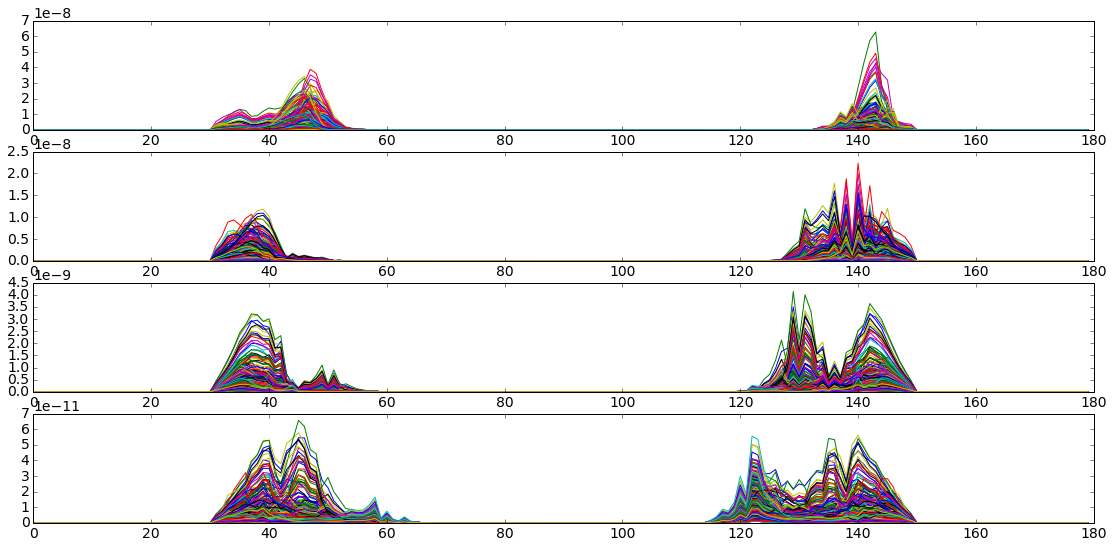

In [99]:
from coordinate_structure import coordinate_structure
out_lats = np.arange(1,90,1)

cs = coordinate_structure(out_lats, [0], [100],'geomagnetic')
cs.transform_to('L_dipole')
L_targs = cs.L()


fig = plt.figure()
flux_vs_l = dict()
ax = []
var = dict()
for i, k in enumerate(data_dict.keys()):
    lmatrix = np.flipud(data_dict[k][1:90,:] + data_dict[k][91:,:])
    print np.shape(lmatrix)
    flux_vs_l[k] = np.sum(lmatrix, axis=1)/np.shape(lmatrix)[1]
    
#     flux_vs_l[k] = lvec
    var[k] = np.var(lmatrix, axis=1) #np.var(data_dict[k][1:90/np.shape(data_dict[k])[1], axis=1)
    ax.append(fig.add_subplot(len(data_dict.keys()),1,i+1))
    ax[i].plot(data_dict[k]/np.shape(data_dict[k])[1])
plt.show()
# plt.figure()
# for k in data_dict.keys():
#     print np.shape(flux_vs_l[k])
#     plt.plot(L_targs, flux_vs_l[k]/np.max(flux_vs_l[k]), label='band %d'%k)
#     plt.xlim([1.2, 4])
# #     plt.ylim([1e-8, 1e-5])
# plt.legend()

(89,)
(89,)
(89,)
(46,)
(30,)


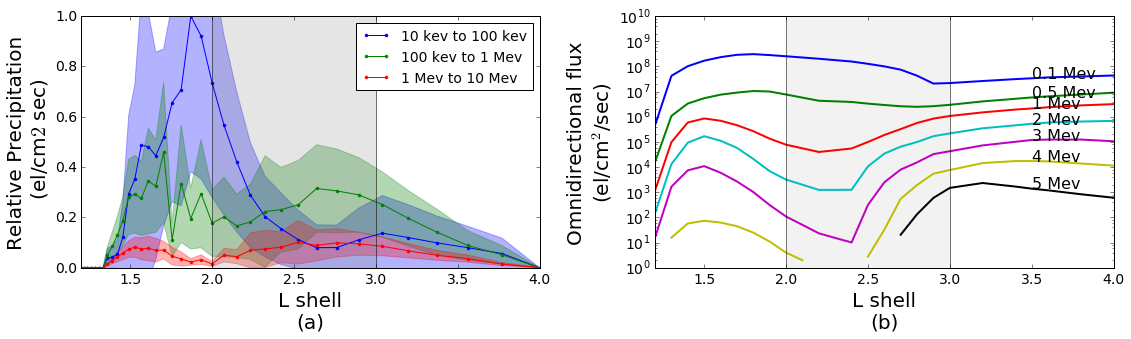

In [289]:
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
fig_width = 15 #fig_width_pt*inches_per_pt  # width in inches
fig_height = 4 # fig_width*golden_mean*2      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 20,
          'font.size': 16,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)




fig, ax = plt.subplots(1,2)

# Peak value over all bins (just here for a nice normalization constant)
maxval = np.max([np.max(flux_vs_l[k]) for k in data_dict.keys()])
# maxval =1
plotcolors = ['blue','green', 'red', 'black']
labels = ['10 kev to 100 kev', '100 kev to 1 Mev', '1 Mev to 10 Mev']
for i, k in enumerate(data_dict.keys()[0:-1]):
    print np.shape(flux_vs_l[k])
    
    upper_bound = flux_vs_l[k] + np.sqrt(var[k])/2
    lower_bound = flux_vs_l[k] - np.sqrt(var[k])/2
    
    ax[0].plot(L_targs, flux_vs_l[k]/maxval,  '.-', linewidth=1,color=plotcolors[i], label=labels[k])
    ax[0].fill_between(L_targs, lower_bound/maxval, upper_bound/maxval, color=plotcolors[i], alpha=0.3)
    ax[0].set_xlim([1.2, 4])
    ax[0].set_ylim([0,1])
ax[0].legend()
ax[0].plot([2, 2], [0, 1], 'k', linewidth=1, alpha=0.5)
ax[0].plot([3, 3], [0, 1], 'k', linewidth=1, alpha=0.5)
ax[0].fill_between([2, 2, 3, 3], [1, 1, 1, 1], color='grey', alpha= 0.2)

ax[0].set_xlabel('L shell\n(a)')
ax[0].set_ylabel('Relative Precipitation\n (el/cm$2$ sec)')



# Plot some AE8 data:
# Plot some AE8 data:
J_file = '../WIPPv4/codesrc/EQFLUXMA.dat'
J = np.loadtxt(J_file)

# J has dimensions L-shell x Energy

Jl = J[1:,0]  # First column: L-shells
Je = J[0,1:]  # First row: Energies
J = J[1:,1:]  # Data
print np.shape(Jl)
print np.shape(Je)

j_bands = np.array([0.1, 0.5, 1, 2, 3, 4, 5])
for ee in j_bands:
    ni = nearest_index(Je, [ee])
    ax[1].semilogy(Jl, J[:,ni], linewidth=2, label='%1.1f Mev'%ee)
# ax[1].grid()
# ax[1].legend()
ax[1].set_xlim([1.2, 4])


ax[1].plot([2, 2], [1, 1e10], 'k', linewidth=1, alpha=0.5)
ax[1].plot([3, 3], [1, 1e10], 'k', linewidth=1, alpha=0.5)
ax[1].fill_between([2, 2, 3, 3], np.array([1e0, 1e10, 1e10, 1e0]), color='grey', alpha=0.1)

ax[1].set_xlabel('L shell\n(b)')
ax[1].set_ylabel('Omnidirectional flux\n(el/cm$^2$/sec)')

fig.tight_layout()

for ev in j_bands:
    ny = nearest_index(Je, [ev])
    nx = nearest_index(Jl, [3.5])
    plt.text(3.5, J[nx,ny], '%g Mev'%ev)


plt.savefig('energy_dependence.png',bb_inches='tight', ldpi=300)





(46,)
(30,)


ValueError: x and y must have same first dimension

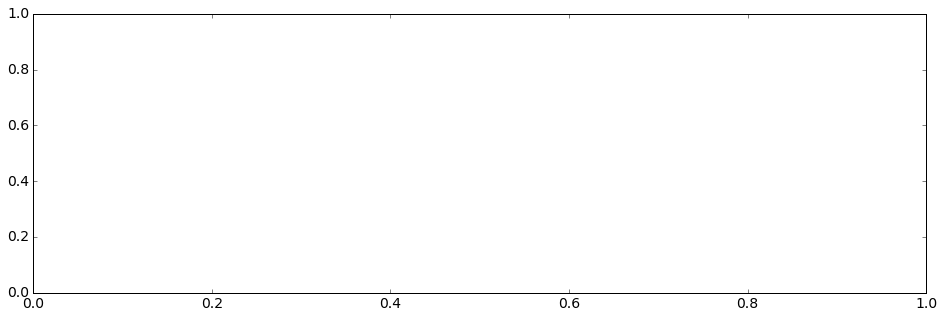

In [227]:

# Plot some AE8 data:
J_file = '../WIPPv4/codesrc/EQFLUXMA.dat'
J = np.loadtxt(J_file)

# J has dimensions L-shell x Energy

Jl = J[1:,0]  # First column: L-shells
Je = J[0,1:]  # First row: Energies
J = J[1:,1:]  # Data
print np.shape(Jl)
print np.shape(Je)

Jinterp = interpolate.RegularGridInterpolator((Jl, Je), J, fill_value = 0, bounds_error=False)

in_L = np.arange(1.5, 4, 0.1)
in_E = np.array([0.1])
jx, jy = np.meshgrid(in_L, in_E)
keys = np.array([jx.ravel(), jy.ravel()]).T

Jout = Jinterp(keys).reshape(len(in_E), len(in_L)).T

plt.figure()
plt.plot(L_targs, Jout)
